### Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### Loading the data

In [2]:
covid_cases = pd.read_excel("After_OLS.xlsx")

In [3]:
#covid_cases.head()

### Checking all the missing values

In [4]:
covid_cases.isna().sum()

CatchmentYear          0
White                  0
Asian                  0
IMD Score              0
LTLA21NM               0
UTLA21NM               0
NHSRegionsLocalName    0
STP20NM                0
PHEC15NM               0
Age                    0
Catchment              0
Variance               0
infect_pro             0
TrustCode              0
dtype: int64

### Plotting the data

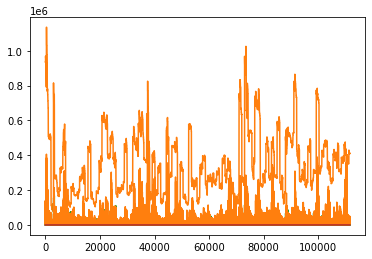

In [5]:
plt.plot(covid_cases)

### Plotting the heatmap for visualisation

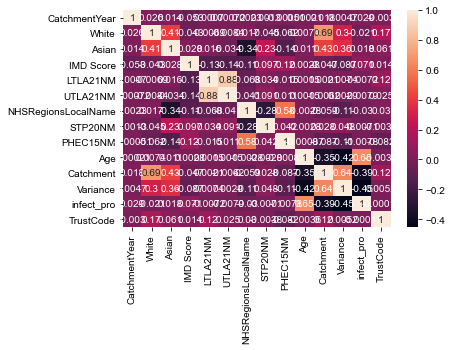

In [6]:
sns.heatmap(covid_cases.corr(), annot=True)
sns.set(rc={'figure.figsize':(10, 10)})

### Normalisation

In [7]:
scaler = MinMaxScaler()
nor_df = pd.DataFrame(scaler.fit_transform(covid_cases), columns=covid_cases.columns)
nor_df.head()

,CatchmentYear,White,Asian,IMD Score,LTLA21NM,UTLA21NM,NHSRegionsLocalName,STP20NM,PHEC15NM,Age,Catchment,Variance,infect_pro,TrustCode
0,1.0,0.810342,0.433708,0.527071,0.529915,0.538462,0.615385,0.365854,0.5,0.166667,0.467200,0.163624,0.094707,0.0
1,1.0,0.810342,0.433708,0.527071,0.529915,0.538462,0.615385,0.365854,0.5,0.333333,0.483628,0.125492,0.113555,0.0
2,1.0,0.810342,0.433708,0.527071,0.529915,0.538462,0.615385,0.365854,0.5,0.000000,0.516944,0.030480,0.473391,0.0
3,1.0,0.810342,0.433708,0.527071,0.529915,0.538462,0.615385,0.365854,0.5,0.111111,0.611707,0.202487,0.094234,0.0
4,1.0,0.810342,0.433708,0.527071,0.529915,0.538462,0.615385,0.365854,0.5,0.222222,0.568280,0.222032,0.080753,0.0


In [8]:
#np.unique(nor_df['TrustCode'])

### Dropping the column for using it as label

In [9]:
nor_array = nor_df.drop(['TrustCode'],axis = 1)

### Converting dataframe into array for applying PCA

In [10]:
nor_array = nor_array.to_numpy()

### Defining a function for centralisation 

In [11]:
def centralize(data):
    centralizedData = data.copy()

    rows = data.shape[0]
    cols = data.shape[1]



    for j in range(cols):
        mu = np.mean(data[:,j])



        for i in range(rows):
            centralizedData[i,j] = (data[i,j] - mu)



    return centralizedData

### Applying PCA

In [12]:
#import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

centralizedData = centralize(nor_array)




## Correlation
np.corrcoef(centralizedData,rowvar=False)



pca = PCA(n_components=nor_array.shape[1])



pca.fit(centralizedData)



Coeff = pca.components_


In [13]:
transformedData = pca.transform(centralizedData)

In [14]:
Y = covid_cases.iloc[:,13]

In [15]:
set(Y)

{0,
 2,
 3,
 4,
 6,
 7,
 10,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 25,
 27,
 28,
 29,
 31,
 32,
 35,
 36,
 38,
 39,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 56,
 57,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 88,
 90,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 140,
 141}

In [16]:
Y.astype

<bound method NDFrame.astype of 0           0
1           0
2           0
3           0
4           0
         ... 
111579    141
111580    141
111581    141
111582    141
111583    141
Name: TrustCode, Length: 111584, dtype: int64>

### Plotting cummulative variance

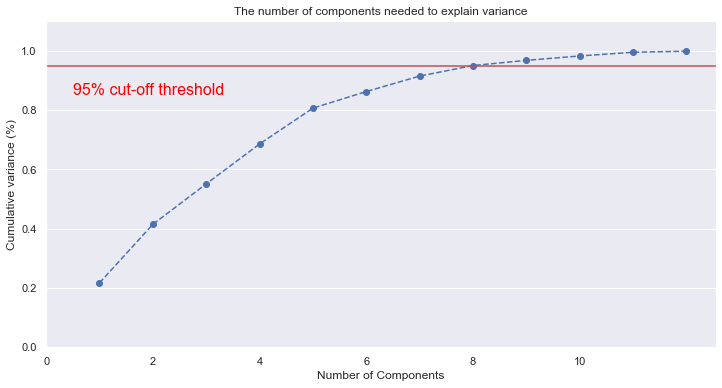

In [17]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)



fig, ax = plt.subplots()
xi = np.arange(1, 13, step=1)
y = np.cumsum(pca.explained_variance_ratio_)[:12]



plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 12, step=2)) #change from 0-based array index to 5-based label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')


#plt.axvline(x=1, color, xmin, xmax, linestyle)


plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)



ax.grid(axis='x')
plt.show()

In [18]:
dt = transformedData[:,:8]
dt

array([[-0.00335984,  0.07403073, -0.24134722, ..., -0.16149896,
         0.64301867, -0.24742847],
       [-0.00332547,  0.07389473, -0.08513724, ..., -0.17234486,
         0.65243951, -0.24852249],
       [-0.00248918,  0.07171919, -0.26033296, ..., -0.12934444,
         0.63978621, -0.26141041],
       ...,
       [-0.46289088,  0.59537561, -0.24661967, ..., -0.35402501,
        -0.11256257, -0.20345321],
       [-0.46307408,  0.59505944, -0.19656167, ..., -0.35884748,
        -0.10767279, -0.20374282],
       [-0.46156369,  0.59654049,  0.15943608, ..., -0.35809453,
        -0.12216133, -0.20124308]])

In [19]:
dt.shape

(111584, 8)

### libraries to perform various classifiacation

In [20]:


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics


### Splitting the data to train and test

In [21]:
#X = transformedData

X_train, X_test, y_train, y_test = train_test_split(dt, Y, test_size=0.20, random_state=42)

In [22]:
Y

0           0
1           0
2           0
3           0
4           0
         ... 
111579    141
111580    141
111581    141
111582    141
111583    141
Name: TrustCode, Length: 111584, dtype: int64

### Applying classification model 

#### Performing KNN classification

In [23]:
%time
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(n_neighbors=2)

In [24]:
%time
pred = knn.predict(X_test)
pred

Wall time: 0 ns


array([85, 76, 70, ..., 59, 67, 54], dtype=int64)

In [25]:
# Accuracy 

accuracy_score(y_test, pred)


0.9927857686965094

In [26]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, pred)

array([[223,   0,   0, ...,   0,   0,   0],
       [  0, 201,   0, ...,   0,   0,   0],
       [  0,   0, 202, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 224,   0,   0],
       [  0,   0,   0, ...,   0, 197,   0],
       [  0,   0,   0, ...,   0,   0, 196]], dtype=int64)

In [27]:
# F1 score

f1_score(y_test, pred, average = 'weighted')

0.9925869591561168

In [28]:
# Precision

precision_score(y_test, pred,average = 'weighted')

0.9943097145034646

In [29]:
# Recall

recall_score(y_test, pred,average = 'weighted')

0.9927857686965094

In [30]:
#plot_confusion_matrix(knn, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           2       1.00      1.00      1.00       201
           3       1.00      1.00      1.00       202
           4       1.00      1.00      1.00        65
           6       1.00      1.00      1.00       190
           7       1.00      1.00      1.00       197
          10       1.00      1.00      1.00       199
          12       1.00      1.00      1.00       221
          14       1.00      1.00      1.00       199
          15       1.00      1.00      1.00       214
          16       1.00      1.00      1.00       205
          17       1.00      1.00      1.00       200
          18       1.00      1.00      1.00       205
          19       1.00      1.00      1.00       195
          20       1.00      1.00      1.00       229
          25       1.00      1.00      1.00       196
          27       1.00      1.00      1.00       211
          28       1.00    

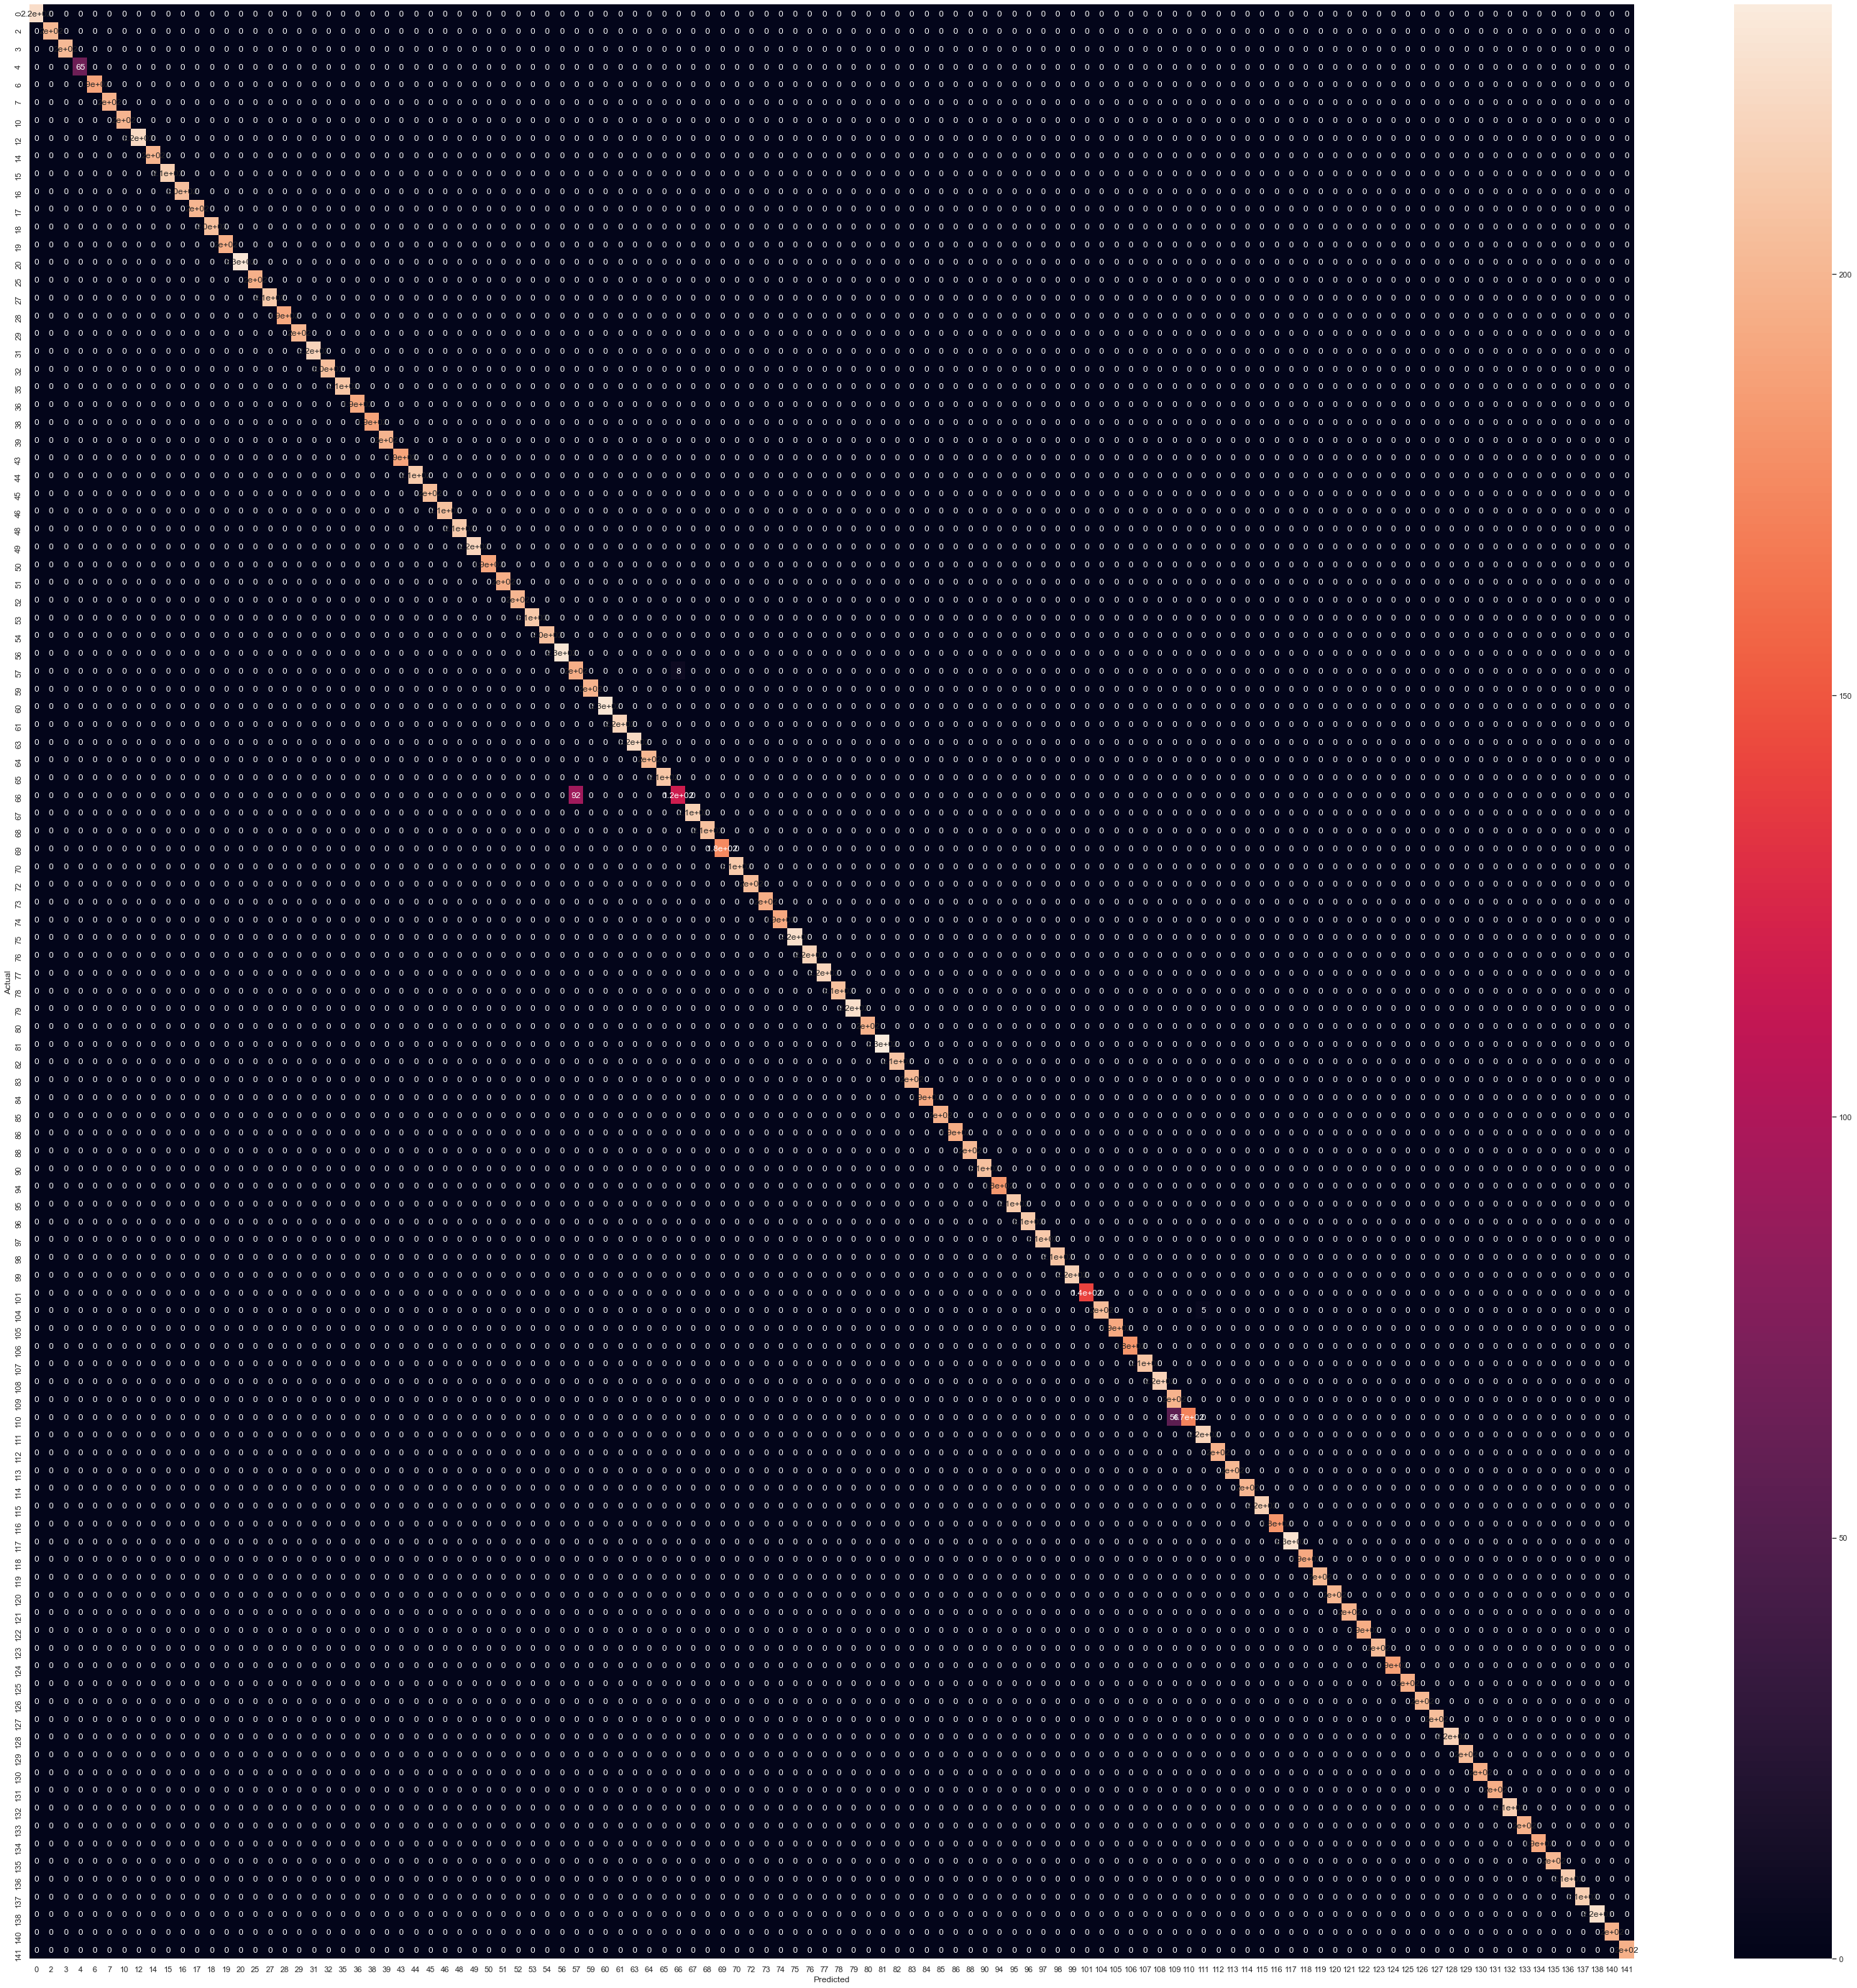

In [31]:
# Confusion Matrix and accuracy


confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
sns.set(rc={'figure.figsize':(50, 50)})
sns.heatmap(confusion_matrix, annot=True)

print(classification_report(y_test, pred))
print('Accuracy: ',metrics.accuracy_score(y_test, pred))

plt.show()

### SVC Classification

In [32]:
%time
svm= SVC(gamma='auto')
svm.fit(X_train, y_train)

Wall time: 0 ns


SVC(gamma='auto')

In [33]:
%time
pred1=svm.predict(X_test)
accuracy_score(y_test,pred1)


Wall time: 0 ns


0.980552941703634

In [34]:
# F1 score

f1_score(y_test, pred1, average = 'weighted')

0.9775375677986107

In [35]:
# Accuracy

accuracy_score(y_test, pred1)

0.980552941703634

In [36]:
# Recall

recall_score(y_test, pred1, average = 'weighted')

0.980552941703634

In [37]:
# Precision

precision_score(y_test, pred1, average = 'weighted')

0.9861952699401396

In [38]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test,pred1)

array([[223,   0,   0, ...,   0,   0,   0],
       [  0, 201,   0, ...,   0,   0,   0],
       [  0,   0, 202, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 224,   0,   0],
       [  0,   0,   0, ...,   0, 197,   0],
       [  0,   0,   0, ...,   0,   0, 196]], dtype=int64)

### Decision Tree Classification

In [39]:
%time
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

Wall time: 0 ns


DecisionTreeClassifier(random_state=42)

In [40]:
%time
pred2 = clf.predict(X_test)

Wall time: 0 ns


In [41]:
# Accuracy

accuracy_score(y_test, pred2)

0.9993726755388269

In [42]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, pred2)

array([[223,   0,   0, ...,   0,   0,   0],
       [  0, 201,   0, ...,   0,   0,   0],
       [  0,   0, 202, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 224,   0,   0],
       [  0,   0,   0, ...,   0, 197,   0],
       [  0,   0,   0, ...,   0,   0, 196]], dtype=int64)

In [43]:
# F1 score

f1_score(y_test, pred2, average = 'weighted')

0.9993725276233189

In [44]:
# Precision

precision_score(y_test, pred2, average = 'weighted')

0.9993757454663237

In [45]:
# Recall

recall_score(y_test, pred2, average = 'weighted')

0.9993726755388269

### Random Forrest Classification

In [46]:
%time
rf=RandomForestClassifier(max_depth=2,random_state=42)
rf.fit(X_train,y_train)

Wall time: 0 ns


RandomForestClassifier(max_depth=2, random_state=42)

In [47]:
%time
pred3 = rf.predict(X_test)

Wall time: 0 ns


In [48]:
# Accuracy

accuracy_score(y_test,pred3)

0.6664874311063315

In [49]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test,pred3)

array([[117,   0,   0, ...,   0,   0,   0],
       [  0, 201,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [176,   0,   0, ...,   4,   0,   0],
       [  0,   0,   0, ...,   0, 197,   0],
       [  0,   0,   0, ...,   0,   0, 196]], dtype=int64)

In [50]:
# F1 score

f1_score(y_test, pred3, average = 'weighted')

0.5910877827420399

In [51]:
# Recall

recall_score(y_test, pred3, average = 'weighted')

0.6664874311063315

In [52]:
# Precision

precision_score(y_test, pred3, average = 'weighted')

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6077843435923408

# Report of all classification models

In [53]:
knn_report =  classification_report(y_test, pred )

In [54]:
print(knn_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           2       1.00      1.00      1.00       201
           3       1.00      1.00      1.00       202
           4       1.00      1.00      1.00        65
           6       1.00      1.00      1.00       190
           7       1.00      1.00      1.00       197
          10       1.00      1.00      1.00       199
          12       1.00      1.00      1.00       221
          14       1.00      1.00      1.00       199
          15       1.00      1.00      1.00       214
          16       1.00      1.00      1.00       205
          17       1.00      1.00      1.00       200
          18       1.00      1.00      1.00       205
          19       1.00      1.00      1.00       195
          20       1.00      1.00      1.00       229
          25       1.00      1.00      1.00       196
          27       1.00      1.00      1.00       211
          28       1.00    

In [55]:
svm_report =  classification_report(y_test, pred1 )

In [56]:
print(svm_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           2       1.00      1.00      1.00       201
           3       1.00      1.00      1.00       202
           4       1.00      1.00      1.00        65
           6       1.00      1.00      1.00       190
           7       1.00      1.00      1.00       197
          10       1.00      1.00      1.00       199
          12       1.00      1.00      1.00       221
          14       1.00      1.00      1.00       199
          15       1.00      1.00      1.00       214
          16       1.00      1.00      1.00       205
          17       1.00      1.00      1.00       200
          18       1.00      1.00      1.00       205
          19       1.00      1.00      1.00       195
          20       1.00      1.00      1.00       229
          25       1.00      1.00      1.00       196
          27       1.00      1.00      1.00       211
          28       1.00    

In [57]:
clf_report =  classification_report(y_test, pred2 )

In [58]:
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           2       1.00      1.00      1.00       201
           3       1.00      1.00      1.00       202
           4       1.00      1.00      1.00        65
           6       1.00      1.00      1.00       190
           7       1.00      1.00      1.00       197
          10       1.00      1.00      1.00       199
          12       1.00      1.00      1.00       221
          14       1.00      1.00      1.00       199
          15       1.00      1.00      1.00       214
          16       1.00      1.00      1.00       205
          17       1.00      1.00      1.00       200
          18       1.00      1.00      1.00       205
          19       1.00      1.00      1.00       195
          20       1.00      1.00      1.00       229
          25       1.00      1.00      1.00       196
          27       1.00      1.00      1.00       211
          28       1.00    

In [59]:
rf_report =  classification_report(y_test, pred3 )

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
print(rf_report)

              precision    recall  f1-score   support

           0       0.40      0.52      0.45       223
           2       1.00      1.00      1.00       201
           3       0.00      0.00      0.00       202
           4       0.00      0.00      0.00        65
           6       0.44      0.99      0.61       190
           7       1.00      1.00      1.00       197
          10       1.00      1.00      1.00       199
          12       1.00      1.00      1.00       221
          14       1.00      1.00      1.00       199
          15       0.00      0.00      0.00       214
          16       1.00      1.00      1.00       205
          17       1.00      0.01      0.01       200
          18       0.90      1.00      0.95       205
          19       0.50      1.00      0.66       195
          20       0.00      0.00      0.00       229
          25       0.37      1.00      0.55       196
          27       1.00      1.00      1.00       211
          28       1.00    